In [1]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('text',usetex=True)
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif']=['Verdana']
plt.rcParams.update({'font.size': 15})
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 5))
        else:
            spine.set_color('none')
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        ax.yaxis.set_ticks([])
    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
            ax.xaxis.set_ticks([])
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.dpi'] = 150
dpiFig = 300.

In [46]:
ddir_load = '/glade/work/kjmayer/research/catalyst/ENSOvsMJO/data/'
avg_inputweight = np.load(ddir_load+'model_inputweight_ENSOMJOsubset__LEAD_7-30_AVG_7__avg00001-00005.npy')
LEADS = np.arange(7,31)
AVGS = np.arange(7,32)
FS = 18

## PLOT

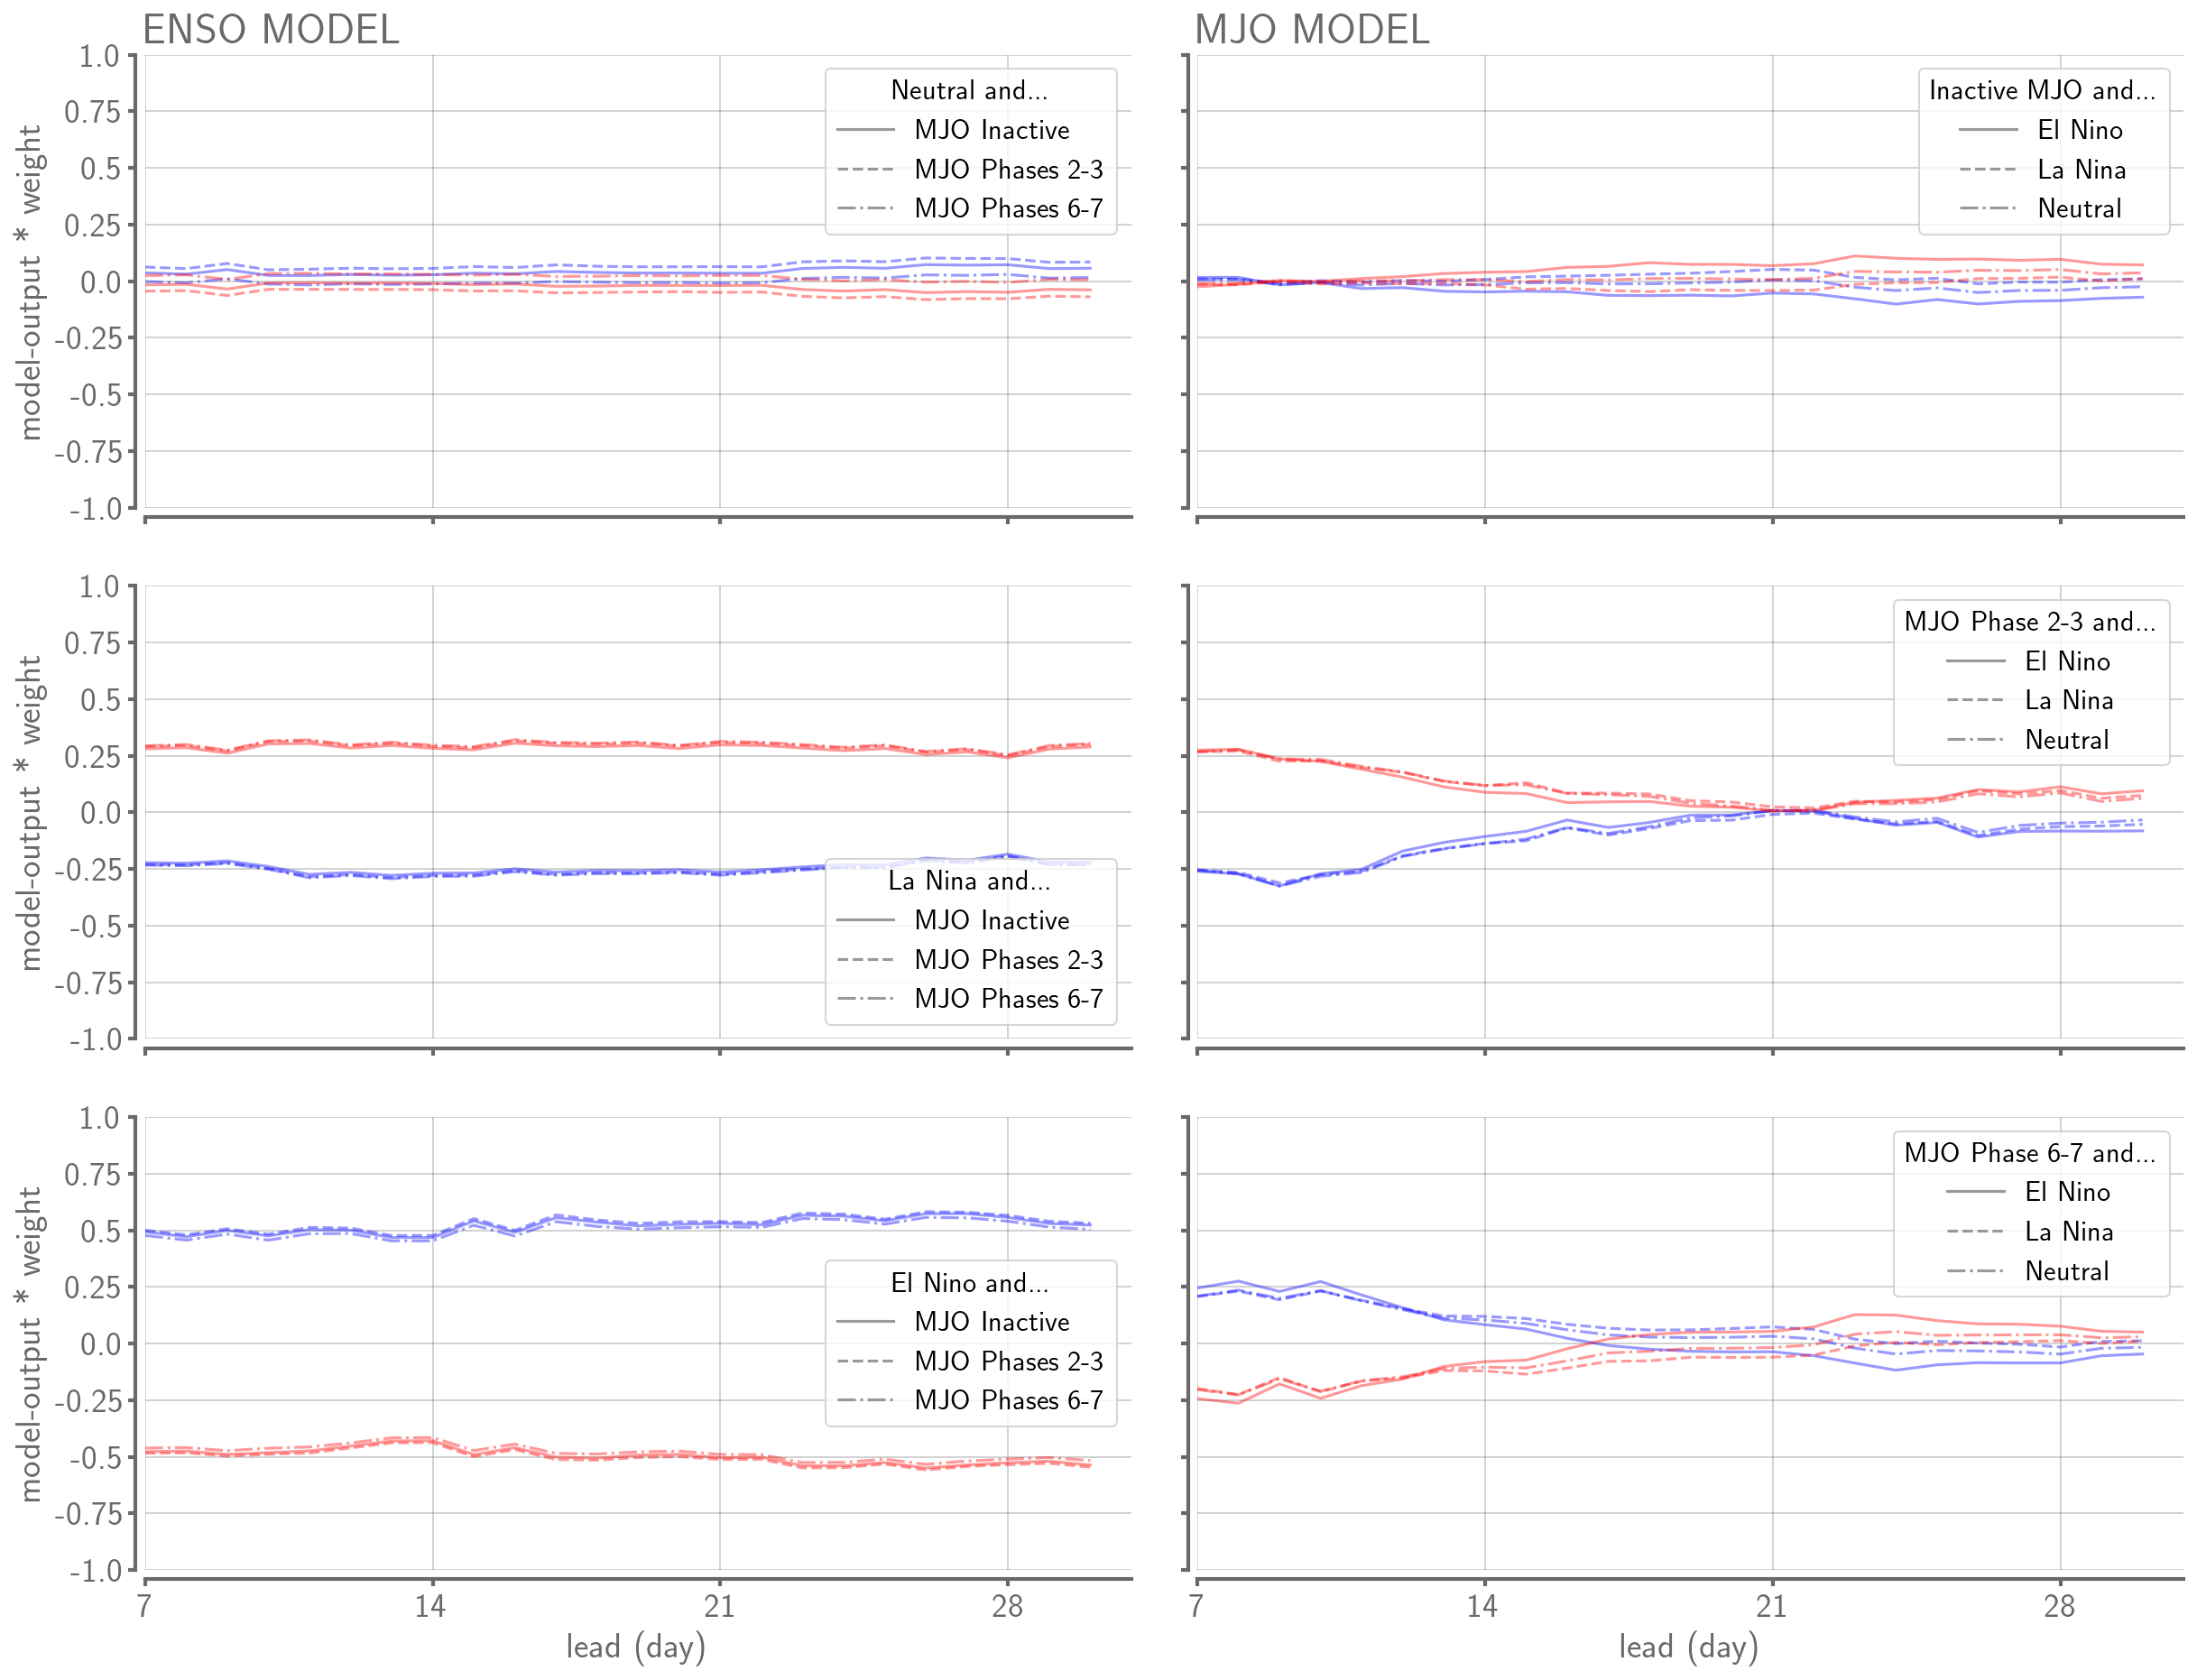

In [47]:
fig = plt.figure(figsize=(16,12))
ax = fig.subplot_mosaic('''
                        AB
                        CD
                        EF
                        ''')
plt.tight_layout(w_pad=0)
for loc in ['A','B','C','D','E','F']:   
    adjust_spines(ax[loc], ['left', 'bottom'])
    ax[loc].spines['top'].set_color('none')
    ax[loc].spines['right'].set_color('none')
    ax[loc].spines['left'].set_color('dimgrey')
    ax[loc].spines['bottom'].set_color('dimgrey')
    ax[loc].spines['left'].set_linewidth(2)
    ax[loc].spines['bottom'].set_linewidth(2)
    ax[loc].tick_params('both',length=4,width=2,which='major',color='dimgrey')
    ax[loc].yaxis.grid(zorder=1,color='dimgrey',alpha=0.35)
    ax[loc].xaxis.grid(zorder=1,color='dimgrey',alpha=0.35)
    
    ax[loc].set_ylim(-1,1)
    ax[loc].set_xlim(0,len(LEADS))
    
    # ax[loc].plot(avg_inputweight[:,0,6,0]*0,color='dimgrey',linewidth=2,alpha=0.5)


for loc in ['A','C','E']:
    ax[loc].set_yticks(np.arange(-1,1.25,0.25),np.round(np.arange(-1,1.25,0.25),2),fontsize=FS,color='dimgrey')
    ax[loc].set_ylabel('model-output * weight',fontsize=FS+1,color='dimgrey')
    
for loc in ['E','F']:
    ax[loc].set_xticks(np.arange(0,28,7),np.arange(LEADS[0],LEADS[-1],7),fontsize=FS,color='dimgrey')
    ax[loc].set_xlabel('lead (day)',fontsize=FS+1,color='dimgrey')
    

for loc in ['B','D','F']:
    ax[loc].set_yticks(np.arange(-1,1.25,0.25),['']*9,fontsize=FS,color='dimgrey')

for loc in ['A','C','B','D']:
    ax[loc].set_xticks(np.arange(0,28,7),['']*4,fontsize=FS,color='dimgrey')

## ------------------------------------------------------------------------------

ax['A'].set_title('ENSO MODEL',fontsize=FS+5,color='dimgrey',loc='left')
# Neutral negative predictions across leads
ax['A'].plot(avg_inputweight[:,0,6,0],color='blue',linestyle='-',alpha=0.4)
ax['A'].plot(avg_inputweight[:,0,7,0],color='blue',linestyle='--',alpha=0.4)
ax['A'].plot(avg_inputweight[:,0,8,0],color='blue',linestyle='-.',alpha=0.4)

# Neutral positive predictions across leads
ax['A'].plot(avg_inputweight[:,0,6,1],color='red',linestyle='-',alpha=0.4)
ax['A'].plot(avg_inputweight[:,0,7,1],color='red',linestyle='--',alpha=0.4)
ax['A'].plot(avg_inputweight[:,0,8,1],color='red',linestyle='-.',alpha=0.4)

ax['A'].plot(np.zeros(shape=np.shape(avg_inputweight[:,0,0,1]))+np.nan,color='grey',linestyle='-',alpha=0.8,label='MJO Inactive')
ax['A'].plot(np.zeros(shape=np.shape(avg_inputweight[:,0,1,1]))+np.nan,color='grey',linestyle='--',alpha=0.8,label='MJO Phases 2-3')
ax['A'].plot(np.zeros(shape=np.shape(avg_inputweight[:,0,2,1]))+np.nan,color='grey',linestyle='-.',alpha=0.8,label='MJO Phases 6-7')
ax['A'].legend(title='Neutral and...')
## ------------------------------------------------------------------------------
    
# La Nina negative predictions across leads
ax['C'].plot(avg_inputweight[:,0,3,0],color='blue',linestyle='-',alpha=0.4)
ax['C'].plot(avg_inputweight[:,0,4,0],color='blue',linestyle='--',alpha=0.4)
ax['C'].plot(avg_inputweight[:,0,5,0],color='blue',linestyle='-.',alpha=0.4)

# La Nina positive predictions across leads
ax['C'].plot(avg_inputweight[:,0,3,1],color='red',linestyle='-',alpha=0.4)
ax['C'].plot(avg_inputweight[:,0,4,1],color='red',linestyle='--',alpha=0.4)
ax['C'].plot(avg_inputweight[:,0,5,1],color='red',linestyle='-.',alpha=0.4)

ax['C'].plot(np.zeros(shape=np.shape(avg_inputweight[:,0,0,1]))+np.nan,color='grey',linestyle='-',alpha=0.8,label='MJO Inactive')
ax['C'].plot(np.zeros(shape=np.shape(avg_inputweight[:,0,1,1]))+np.nan,color='grey',linestyle='--',alpha=0.8,label='MJO Phases 2-3')
ax['C'].plot(np.zeros(shape=np.shape(avg_inputweight[:,0,2,1]))+np.nan,color='grey',linestyle='-.',alpha=0.8,label='MJO Phases 6-7')
ax['C'].legend(title='La Nina and...')

## ------------------------------------------------------------------------------
    
# El Nino negative predictions across leads
ax['E'].plot(avg_inputweight[:,0,0,0],color='blue',linestyle='-',alpha=0.4)
ax['E'].plot(avg_inputweight[:,0,1,0],color='blue',linestyle='--',alpha=0.4)
ax['E'].plot(avg_inputweight[:,0,2,0],color='blue',linestyle='-.',alpha=0.4)
# El Nino positive predictions across leads
ax['E'].plot(avg_inputweight[:,0,0,1],color='red',linestyle='-',alpha=0.4)
ax['E'].plot(avg_inputweight[:,0,1,1],color='red',linestyle='--',alpha=0.4)
ax['E'].plot(avg_inputweight[:,0,2,1],color='red',linestyle='-.',alpha=0.4)

ax['E'].plot(np.zeros(shape=np.shape(avg_inputweight[:,0,0,1]))+np.nan,color='grey',linestyle='-',alpha=0.8,label='MJO Inactive')
ax['E'].plot(np.zeros(shape=np.shape(avg_inputweight[:,0,1,1]))+np.nan,color='grey',linestyle='--',alpha=0.8,label='MJO Phases 2-3')
ax['E'].plot(np.zeros(shape=np.shape(avg_inputweight[:,0,2,1]))+np.nan,color='grey',linestyle='-.',alpha=0.8,label='MJO Phases 6-7')

ax['E'].legend(title='El Nino and...')



## ------------------------------------------------------------------------------
ax['B'].set_title('MJO MODEL',fontsize=FS+5,color='dimgrey',loc='left')
# Inactive negative predictions across leads
ax['B'].plot(avg_inputweight[:,1,0,0],color='blue',linestyle='-',alpha=0.4)
ax['B'].plot(avg_inputweight[:,1,3,0],color='blue',linestyle='--',alpha=0.4)
ax['B'].plot(avg_inputweight[:,1,6,0],color='blue',linestyle='-.',alpha=0.4)

# Inactive positive predictions across leads
ax['B'].plot(avg_inputweight[:,1,0,1],color='red',linestyle='-',alpha=0.4)
ax['B'].plot(avg_inputweight[:,1,3,1],color='red',linestyle='--',alpha=0.4)
ax['B'].plot(avg_inputweight[:,1,6,1],color='red',linestyle='-.',alpha=0.4)

ax['B'].plot(np.zeros(shape=np.shape(avg_inputweight[:,0,0,1]))+np.nan,color='grey',linestyle='-',alpha=0.8,label='El Nino')
ax['B'].plot(np.zeros(shape=np.shape(avg_inputweight[:,0,1,1]))+np.nan,color='grey',linestyle='--',alpha=0.8,label='La Nina')
ax['B'].plot(np.zeros(shape=np.shape(avg_inputweight[:,0,2,1]))+np.nan,color='grey',linestyle='-.',alpha=0.8,label='Neutral')
ax['B'].legend(title='Inactive MJO and...')


## ------------------------------------------------------------------------------
# MJO Phase 2-3 negative predictions across leads
ax['D'].plot(avg_inputweight[:,1,1,0],color='blue',linestyle='-',alpha=0.4)
ax['D'].plot(avg_inputweight[:,1,4,0],color='blue',linestyle='--',alpha=0.4)
ax['D'].plot(avg_inputweight[:,1,7,0],color='blue',linestyle='-.',alpha=0.4)

# MJO Phase 2-3 positive predictions across leads
ax['D'].plot(avg_inputweight[:,1,1,1],color='red',linestyle='-',alpha=0.4)
ax['D'].plot(avg_inputweight[:,1,4,1],color='red',linestyle='--',alpha=0.4)
ax['D'].plot(avg_inputweight[:,1,7,1],color='red',linestyle='-.',alpha=0.4)

ax['D'].plot(np.zeros(shape=np.shape(avg_inputweight[:,0,0,1]))+np.nan,color='grey',linestyle='-',alpha=0.8,label='El Nino')
ax['D'].plot(np.zeros(shape=np.shape(avg_inputweight[:,0,1,1]))+np.nan,color='grey',linestyle='--',alpha=0.8,label='La Nina')
ax['D'].plot(np.zeros(shape=np.shape(avg_inputweight[:,0,2,1]))+np.nan,color='grey',linestyle='-.',alpha=0.8,label='Neutral')
ax['D'].legend(title='MJO Phase 2-3 and...')


## ------------------------------------------------------------------------------
# MJO Phase 6-7 negative predictions across leads
ax['F'].plot(avg_inputweight[:,1,2,0],color='blue',linestyle='-',alpha=0.4)
ax['F'].plot(avg_inputweight[:,1,5,0],color='blue',linestyle='--',alpha=0.4)
ax['F'].plot(avg_inputweight[:,1,8,0],color='blue',linestyle='-.',alpha=0.4)

# MJO Phase 6-7 positive predictions across leads
ax['F'].plot(avg_inputweight[:,1,2,1],color='red',linestyle='-',alpha=0.4)
ax['F'].plot(avg_inputweight[:,1,5,1],color='red',linestyle='--',alpha=0.4)
ax['F'].plot(avg_inputweight[:,1,8,1],color='red',linestyle='-.',alpha=0.4)

ax['F'].plot(np.zeros(shape=np.shape(avg_inputweight[:,0,0,1]))+np.nan,color='grey',linestyle='-',alpha=0.8,label='El Nino')
ax['F'].plot(np.zeros(shape=np.shape(avg_inputweight[:,0,1,1]))+np.nan,color='grey',linestyle='--',alpha=0.8,label='La Nina')
ax['F'].plot(np.zeros(shape=np.shape(avg_inputweight[:,0,2,1]))+np.nan,color='grey',linestyle='-.',alpha=0.8,label='Neutral')
ax['F'].legend(title='MJO Phase 6-7 and...')

plt.show()